# Практическая работа по визуализации данных средствами Python

## Цели практической работы

- выбрать подходящую библиотеку для решения задачи визуализации.
- сделать визуализацию данных средствами Python.
- Продемонстрировать сильные стороны визуализации для тестирования гипотез, описания результатов и поиска инсайтов.

## Что нужно сделать

Визуализация данных — полезный инструмент не только для аналитика, но и для заказчика. Поэтому в этом задании вы построите визуализации, которые помогут сформулировать дальнейшие гипотезы, а также продемонстрировать заказчику результаты вашего анализа.

1. Воспользуйтесь таблицей с фродовыми данными, которую вы сохранили в одном из предыдущих модулей. Постройте гистограмму распределения количества этапов воронки, которые были скомпрометированы. Попробуйте объяснить, руководствуясь здравым смыслом, почему именно эти этапы оказались легко атакованы.
2. Постройте воронки продаж по всем каналам коммуникации с клиентом. Сделайте предварительные выводы, какой канал коммуникации кажется вам менее перспективным.
3. Постройте графики затрат для каждого рекламного канала и прибыли по ним на последнем этапе воронки. Подумайте, как удачнее расположить получившиеся графики.
4. Постройте график распределения операционной системы пользователя для каждого канала коммуникации. Какие выводы можно сделать?

In [206]:
# Загружаем необходимые для работы библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

In [205]:
!pip install matplotlib

In [208]:
import plotly.graph_objs as go

### 1. Работа с таблицей с фродовыми значениями

In [95]:
# Считываем данные в датафрейм
df_500 = pd.read_csv('df_500.csv')
df_500.head()

,ad_channel,user_id,funnel_stage,timestamp,profit,os,price,count
0,video,856262,interest,150036,NaN,iOS,0.75,585
1,video,856262,interest,150036,NaN,Android,0.75,585
2,video,856262,interest,150036,NaN,Android,0.75,585
3,video,856262,interest,150036,NaN,Android,0.75,585
4,video,856262,interest,150036,NaN,Android,0.75,585


Text(0, 0.5, 'Частота')

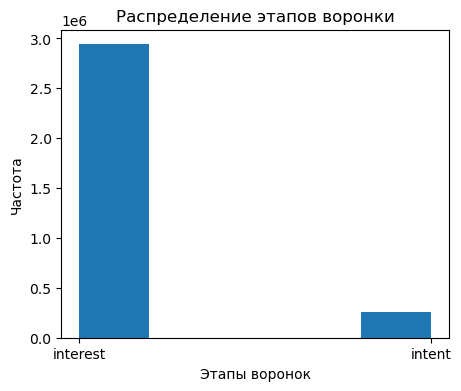

In [80]:
# Построем гистограмму распределения количества этапов воронки, которые были скомпрометированы
# Задаем размер графика
plt.figure(figsize=(5,4))
# Построение гистограммы
plt.hist(df_500['funnel_stage'], bins=4)
# Заголовок
plt.title('Распределение этапов воронки')
# Название оси Х
plt.xlabel('Этапы воронок')
# Название оси Y
plt.ylabel('Частота')

### 1.1 Попробуйте объяснить, руководствуясь здравым смыслом, почему именно эти этапы оказались легко атакованы

In [ ]:
# Скомпромитирован в первую очередь был именно начальный этап воронки, а именно то действие, которое могла выполнить бот-программа 

### 2. Построение воронки продаж по всем каналам коммуникации с клиентом

In [106]:
# Считываем данные в датафрейм
df = pd.read_csv('8.6_homework.csv')
df.head()

,ad_channel,user_id,funnel_stage,timestamp,profit,os,price,count
0,video,512217,interest,150000,NaN,iOS,0.75,1
1,video,833649,interest,150000,NaN,Android,0.75,1
2,video,327813,interest,150002,NaN,Android,0.75,1
3,video,241345,interest,150004,NaN,iOS,0.75,1
4,video,212554,interest,150004,NaN,Android,0.75,1


In [107]:
# Оставляем в таблице только нужные параметры и сохраняем в новый датафрейм
df_data = pd.crosstab(df['ad_channel'], df['funnel_stage'])
df_data

funnel_stage,consideration,intent,interest,purchase
ad_channel,,,,
banner,47454,7549,91555,690
native,12585,905,19211,36
organic_traffic,53618,9079,78480,540
partner_network,24737,4385,67603,453
rich,4658,1222,8833,21
search,134305,27980,227162,3090
video,60876,58,98509,5


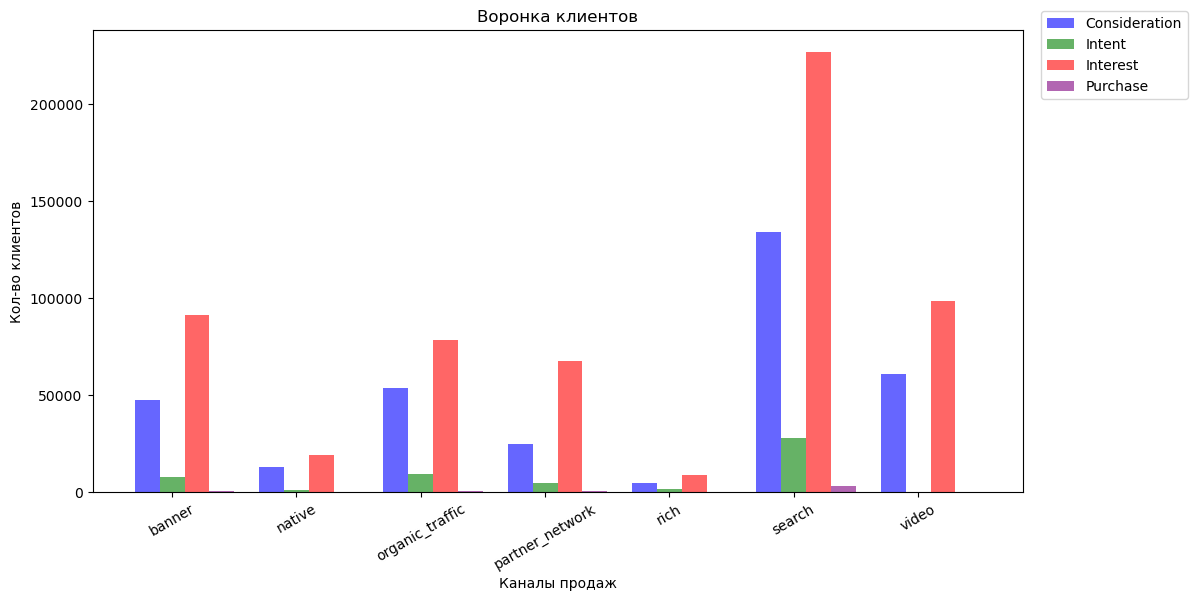

In [124]:
# Построем гистограмму с отражением воронки продаж по всем каналам коммуникации с клиентом
# Данные в переменные
ad_channel = df_data.ad_channel
consideration = df_data.consideration
intent = df_data.intent
interest = df_data.interest
purchase = df_data.purchase

# Настройка параметров графика
bar_width = 0.2
index = np.arange(len(ad_channel))

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))

# Нарисовать столбцы
ax.bar(index, consideration, bar_width,
      color = 'blue', alpha = 0.6,
      label = 'Consideration')
ax.bar(index + bar_width, intent, bar_width,
       color = 'green', alpha = 0.6,
       label = 'Intent')
ax.bar(index + 2 * bar_width, interest, bar_width,
       color = 'red', alpha = 0.6,
       label = 'Interest')
ax.bar(index + 3 * bar_width, purchase, bar_width,
      color = 'purple', alpha = 0.6,
      label = 'Purchase')

# Настройка осей и заголовка
ax.set_xlabel('Каналы продаж')
ax.set_ylabel('Кол-во клиентов')
ax.set_title('Воронка клиентов')

# Указываем место для подписей
ax.set_xticks(index + bar_width)

# Указываем название подписей
ax.set_xticklabels(ad_channel)

# Поворачиваем подпись на осях
ax.tick_params(axis = 'x', labelrotation = 30)

# Легенда
ax.legend(loc = (1.02, 0.85))

# Отображение графика
plt.show()

In [ ]:
# Предварительные выводы:
# Самый большой канал с входящим потоком клиентов (этап воронки "Интерес") - search
# Самый незначительный канал с входящим потоком клиентов (этап воронки "Интерес") - rich
# Самый большой канал с рассмотрением к покупке (выбор планов подписки, хождение по продуктовым страницам) - search
# Самый незначительный канал с рассмотрением к покупке (выбор планов подписки, хождение по продуктовым страницам) - rich
# Самый большой канал с намерением купить (выбор плана, заявка на обратную связь, регистрация) - search
# Самый незначительный канал с намерением купить (выбор плана, заявка на обратную связь, регистрация) - rich
# Из вышеуказанного можно сделать вывод, что самым эффективным каналом является search, а самым менеэффективным rich

### 3. Графики затрат для каждого рекламного канала и прибыли по ним на последнем этапе воронки

In [134]:
# считываем данные в новый датафрейм
df2 = pd.read_csv('8.6_homework.csv')
df2.head()

,ad_channel,user_id,funnel_stage,timestamp,profit,os,price,count
0,video,512217,interest,150000,NaN,iOS,0.75,1
1,video,833649,interest,150000,NaN,Android,0.75,1
2,video,327813,interest,150002,NaN,Android,0.75,1
3,video,241345,interest,150004,NaN,iOS,0.75,1
4,video,212554,interest,150004,NaN,Android,0.75,1


In [135]:
# Оставляем в таблице только нужные параметры
df2.drop(['user_id','timestamp', 'os', 'count'], axis= 1 , inplace= True)
df2.head()

,ad_channel,funnel_stage,profit,price
0,video,interest,NaN,0.75
1,video,interest,NaN,0.75
2,video,interest,NaN,0.75
3,video,interest,NaN,0.75
4,video,interest,NaN,0.75


In [137]:
# Производим сортировку в столбце funnel_stage по значению "purchase"
df2[df2["funnel_stage"] == "purchase"].head()

,ad_channel,funnel_stage,profit,price
61050,video,purchase,50.0,0.75
64692,video,purchase,50.0,0.75
111968,video,purchase,260.0,0.75
121328,video,purchase,1099.0,0.75
144850,video,purchase,2136.0,0.75


In [142]:
# Групперуем столбец 'ad_channel' и высчитываем сумму по значению 'price'
df_cost = df2.groupby('ad_channel', as_index = False).agg(all_price = ('price', 'sum'))
df_cost.head()

,ad_channel,all_price
0,banner,73624.0
1,native,65474.0
2,organic_traffic,0.0
3,partner_network,97178.0
4,rich,36835.0


In [141]:
# Групперуем столбец 'ad_channel' и высчитываем сумму по значению 'profit'
df_income = df2.groupby('ad_channel', as_index = False).agg(all_profit = ('profit', 'sum'))
df_income.head()

,ad_channel,all_profit
0,banner,467173.0
1,native,31665.0
2,organic_traffic,370283.0
3,partner_network,476881.0
4,rich,29301.0


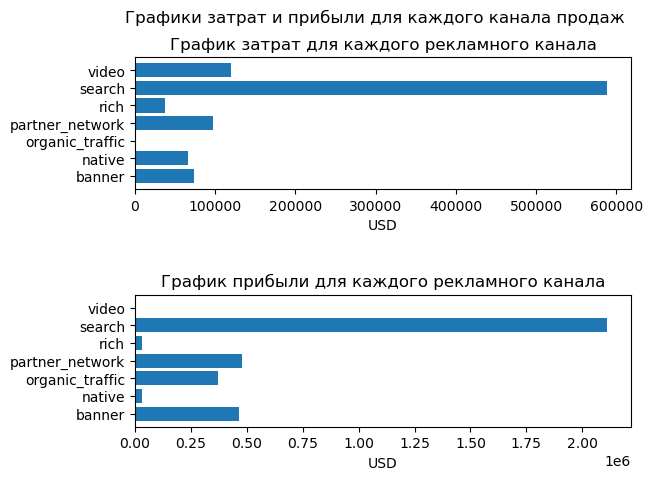

In [154]:
# Воспользуемся методом создания нескольких графиков в одном фрейме
# Данные в переменные
ad_channel_cost = df_cost.ad_channel
price = df_cost.all_price
ad_channel_income = df_income.ad_channel
profit = df_income.all_profit

# Создание объекта графика и осей
fig, ax = plt.subplots(nrows = 2, ncols = 1)
# Название всего фрейма
fig.suptitle('Графики затрат и прибыли для каждого канала продаж')
# Отодвигаем графики друг от друга
fig.subplots_adjust(hspace = 0.8)

# Создаем столбчатый график
ax[0].barh(ad_channel_cost, price)
# Название для графика
ax[0].set_title('График затрат для каждого рекламного канала')
# Подпись к оси Х
ax[0].set_xlabel ('Каналы продаж')
# Подпись к оси Y
ax[0].set_xlabel ('USD')


# Создаем 2-ой столбчатый график
ax[1].barh(ad_channel_income, profit)
# Название для графика
ax[1].set_title('График прибыли для каждого рекламного канала')
# Подпись к оси Х
ax[1].set_xlabel ('Каналы продаж')
# Подпись к оси Y
ax[1].set_xlabel ('USD')


# Отображение графика
plt.show()

In [ ]:
# Так как вышеуказанные графики получились небольшего размера, сформируем их отдельно для более качественной визуализации

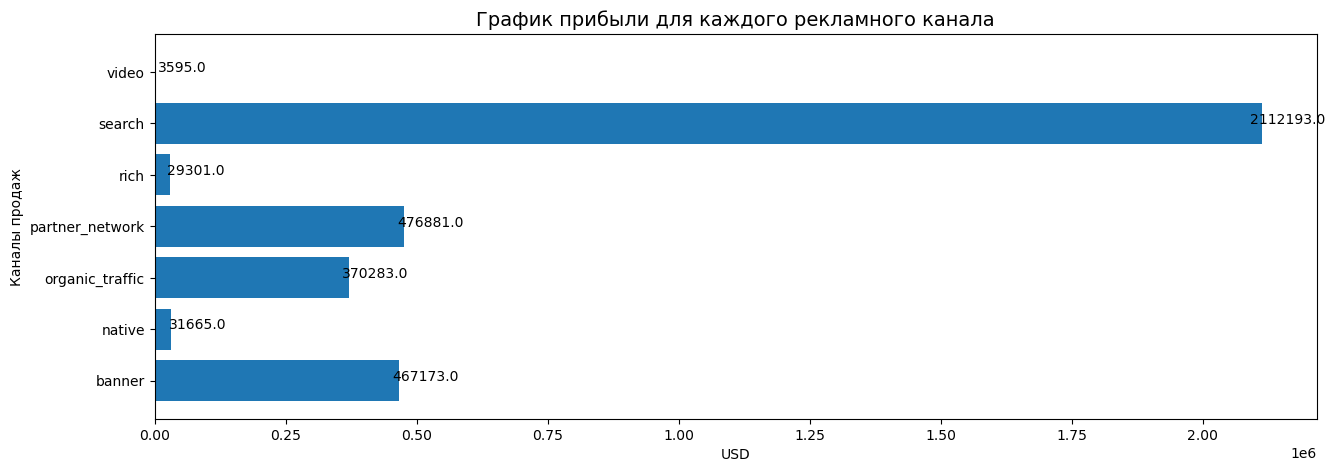

In [158]:
# Задаем размер графика
plt.figure(figsize=(15,5))
# Рисуем перевернутый столбчатый график
plt.barh(ad_channel_income, profit)
plt.title('График прибыли для каждого рекламного канала', fontsize=14)
plt.xlabel('USD')
plt.ylabel('Каналы продаж')
for i, val in enumerate(profit):
    plt.text(x = val + 50000, y = i, s = str(val), ha = 'center')
plt.show()

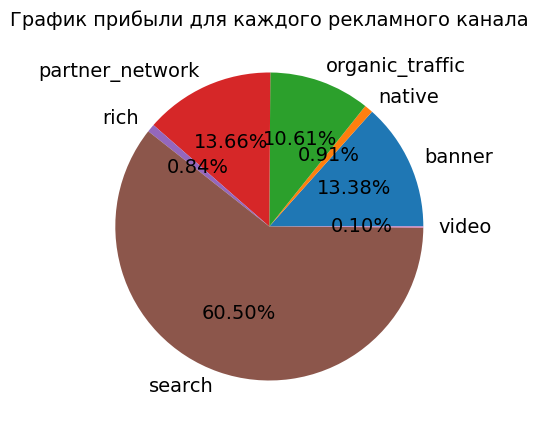

In [192]:
# Создадим дополнительно круговую диаграмму
# Задаем размер графика
plt.figure(figsize=(15,5))
# Рисуем круговую диаграмму
plt.pie(x = profit, labels = ad_channel_income, autopct='%1.2f%%', textprops={'fontsize':14})
# Задаем название
plt.title('График прибыли для каждого рекламного канала', fontsize=14)
plt.show()

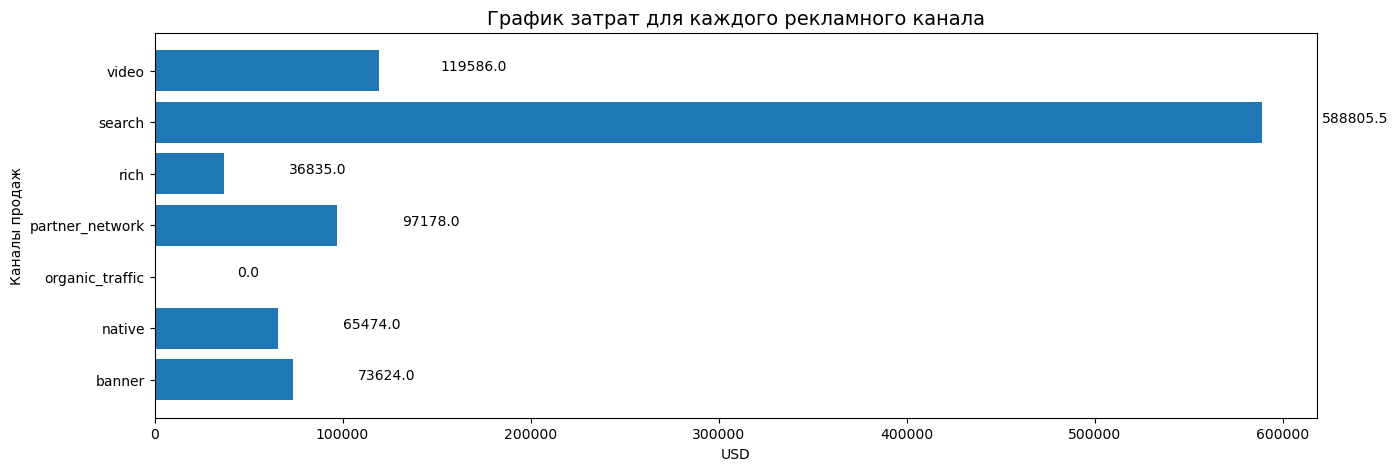

In [160]:
# Задаем размер графика
plt.figure(figsize=(15,5))
# Рисуем перевернутый столбчатый график
plt.barh(ad_channel_cost, price)
plt.title('График затрат для каждого рекламного канала', fontsize=14)
plt.xlabel('USD')
plt.ylabel('Каналы продаж')
for i, val in enumerate(price):
    plt.text(x = val + 50000, y = i, s = str(val), ha = 'center')
plt.show()

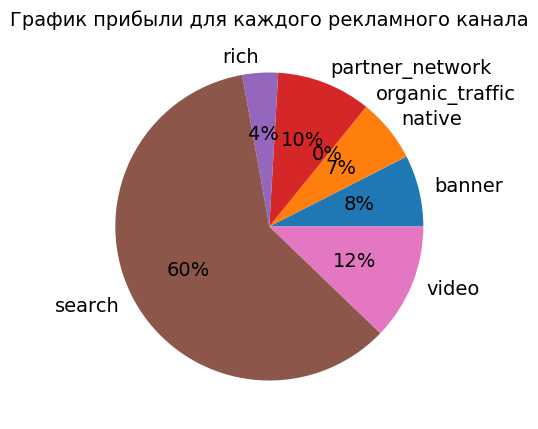

In [194]:
# Создадим дополнительно круговую диаграмму
# Задаем размер графика
plt.figure(figsize=(15,5))
# Рисуем круговую диаграмму
plt.pie(x = price, labels = ad_channel_cost, autopct='%.0f%%', textprops={'fontsize':14})
# Задаем название
plt.title('График прибыли для каждого рекламного канала', fontsize=14)
plt.show()

In [ ]:
# Составим предварительные выводы из указанных графиков:
# Самый эффективный канал с показателем прибыли - search
# Самый незначительный канал с показателем прибыли - video
# Самый менее затратный рекламный канал - organic_traffic
# Самый затратный канал - search
# Самый неэффективный канал по соотношению доход/расход - video (работает в значительный минус, в связи с чем необходимо рассматривать вопрос о его целесообразности)

In [ ]:
# Дополнительое визуализируем данные в едином графике

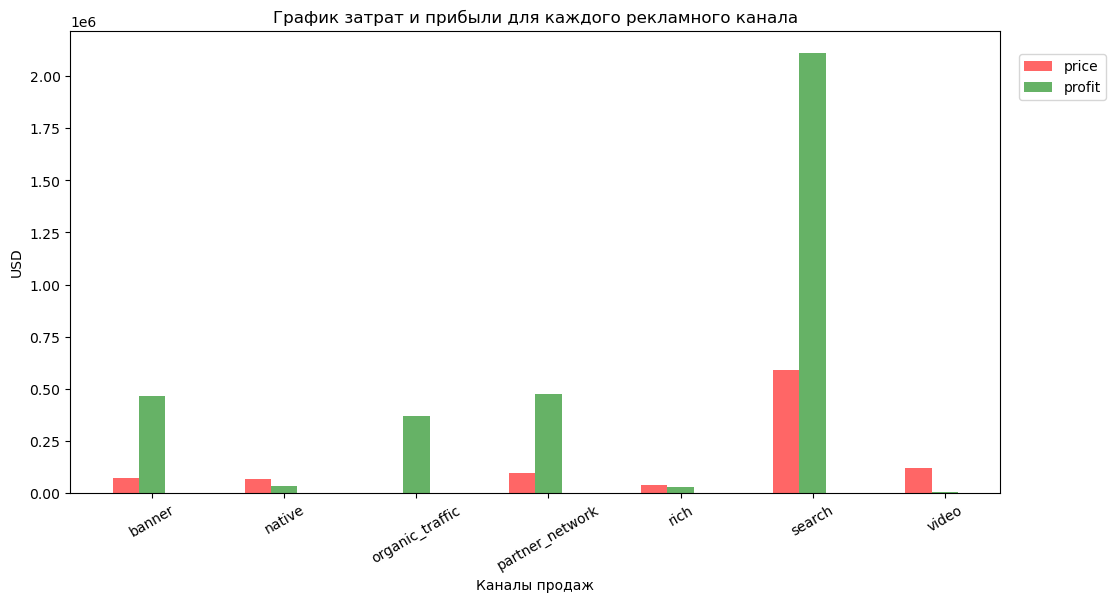

In [181]:
# Данные в переменные
ad_channel_cost = df_cost.ad_channel
price = df_cost.all_price
profit = df_income.all_profit

# Настройка параметров графика
bar_width = 0.2
index = np.arange(len(ad_channel))

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))

# Нарисовать столбцы
ax.bar(index, price, bar_width,
      color = 'red', alpha = 0.6,
      label = 'price')
ax.bar(index + bar_width, profit, bar_width,
       color = 'green', alpha = 0.6,
       label = 'profit')

# Настройка осей и заголовка
ax.set_xlabel('Каналы продаж')
ax.set_ylabel('USD')
ax.set_title('График затрат и прибыли для каждого рекламного канала')

# Указываем место для подписей
ax.set_xticks(index + bar_width)

# Указываем название подписей
ax.set_xticklabels(ad_channel)

# Поворачиваем подпись на осях
ax.tick_params(axis = 'x', labelrotation = 30)

# Легенда
ax.legend(loc = (1.02, 0.85))

# Отображение графика
plt.show()

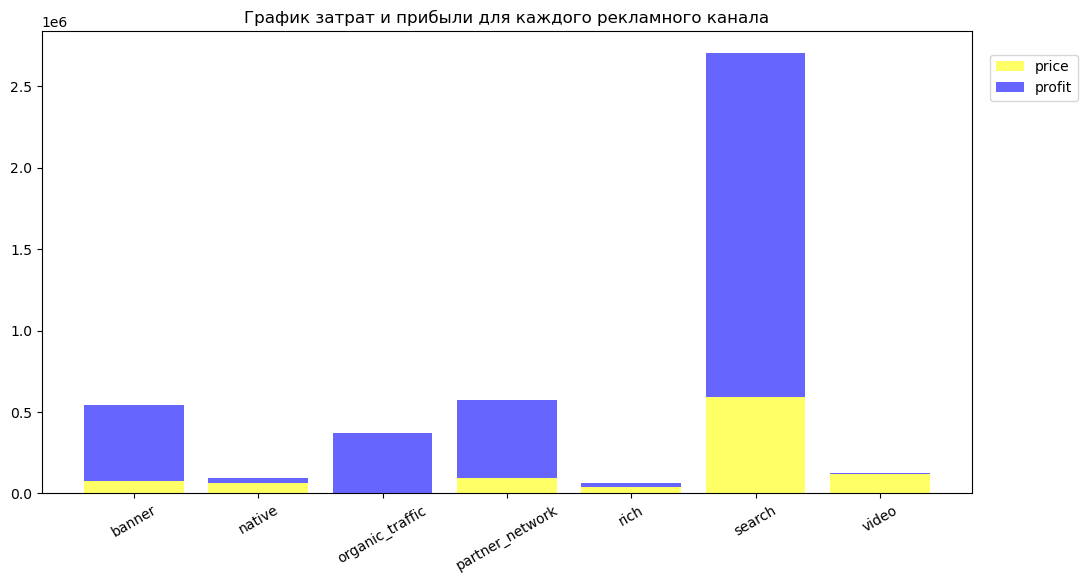

In [203]:
# Построим дополнительно стекнутый график
# Данные в переменные
ad_channel_cost = df_cost.ad_channel
price = df_cost.all_price
profit = df_income.all_profit

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))

# Нарисовать столбцы
ax.bar(ad_channel_cost, price, color = 'yellow', alpha = 0.6,
      label = 'price')
ax.bar(ad_channel_cost, profit, bottom = price, color = 'blue', alpha = 0.6,
      label = 'profit')

# Настраиваем легенду и заголовок
ax.legend(loc = (1.02, 0.85))
ax.set_title('График затрат и прибыли для каждого рекламного канала')

# Поворачиваем подпись на осях
ax.tick_params(axis = 'x', labelrotation = 30)

# Отображение графика
plt.show()

### 4. График распределения операционной системы пользователя для каждого канала коммуникации

In [161]:
# считываем данные в новый датафрейм
df3 = pd.read_csv('8.6_homework.csv')
df3.head()

,ad_channel,user_id,funnel_stage,timestamp,profit,os,price,count
0,video,512217,interest,150000,NaN,iOS,0.75,1
1,video,833649,interest,150000,NaN,Android,0.75,1
2,video,327813,interest,150002,NaN,Android,0.75,1
3,video,241345,interest,150004,NaN,iOS,0.75,1
4,video,212554,interest,150004,NaN,Android,0.75,1


In [162]:
# Оставляем в таблице только нужные параметры
df3.drop(['funnel_stage','timestamp', 'profit', 'price','count'], axis= 1 , inplace= True)
df3.head()

,ad_channel,user_id,os
0,video,512217,iOS
1,video,833649,Android
2,video,327813,Android
3,video,241345,iOS
4,video,212554,Android


In [169]:
# Групперуем столбец 'ad_channel' и 'os', высчитываем кол-во пользователей по значению 'user_id'
df_os = df3.groupby(['ad_channel', 'os'], as_index = False).agg(user_id_count = ('user_id', 'count'))
df_os.head(20)

,ad_channel,os,user_id_count
0,banner,Android,103042
1,banner,iOS,44206
2,native,Android,9877
3,native,iOS,22860
4,organic_traffic,Android,85442
5,organic_traffic,iOS,56275
6,partner_network,Android,48732
7,partner_network,iOS,48446
8,rich,Android,2981
9,rich,iOS,11753


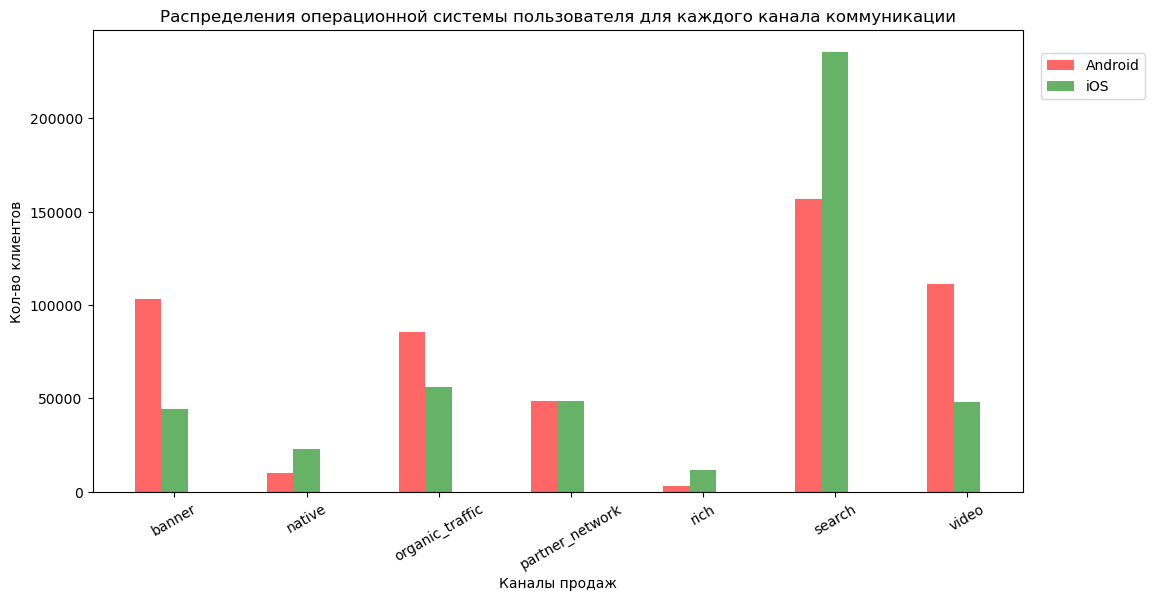

In [176]:
# Построем гистограмму распределения операционной системы пользователя для каждого канала коммуникации
# Данные в переменные
ad_channel = df_os.ad_channel
Android = df_os.Android
iOS = df_os.iOS

# Настройка параметров графика
bar_width = 0.2
index = np.arange(len(ad_channel))

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))

# Нарисовать столбцы
ax.bar(index, Android, bar_width,
      color = 'red', alpha = 0.6,
      label = 'Android')
ax.bar(index + bar_width, iOS, bar_width,
       color = 'green', alpha = 0.6,
       label = 'iOS')

# Настройка осей и заголовка
ax.set_xlabel('Каналы продаж')
ax.set_ylabel('Кол-во клиентов')
ax.set_title('Распределения операционной системы пользователя для каждого канала коммуникации')

# Указываем место для подписей
ax.set_xticks(index + bar_width)

# Указываем название подписей
ax.set_xticklabels(ad_channel)

# Поворачиваем подпись на осях
ax.tick_params(axis = 'x', labelrotation = 30)

# Легенда
ax.legend(loc = (1.02, 0.85))

# Отображение графика
plt.show()

In [212]:
# Для дополнительной визуализации построим точечную диаграмму
# Данные в переменные
ad_channel = df_os.ad_channel
Android = df_os.Android
iOS = df_os.iOS

# Создание трейсов
trace1 = go.Scatter(x = ad_channel, y = Android, name = 'Android', mode = 'markers', marker = dict(color = 'red'))
trace2 = go.Scatter(x = ad_channel, y = iOS, name = 'iOS', mode = 'markers', marker = dict(color = 'green'))

# Добавление трейсов в график
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)

# Настройка названий осей и заголовка графика 
fig.update_layout(title_font = dict(size = 20), xaxis_title = "Каналы продаж", yaxis_title = "Кол-во клиентов")

# Настройка легенды
fig.update_layout(legend=dict(title='Legend', x = 1.05, y = 1))

# Отображение графика
fig.show()

Выводы по проделанной практической работе:

    1. Проведенный анализ по фродовой таблице подтвердил гипотезу о скомпрометированных данных, что видно по графику распределения этапов воронки. Все действия были совершены бот-программой на первом этапе воронки продаж - interest. Также можно объяснить наличием активности бот-программ именно на данных этапах воронки, так как именно на указанном этапе программа может имитировать действия человека.
    
    2. Согласно визуализированной воронке продаж по всем каналам коммуникации с клиентом, можно сделать вывод, что:
    Самый большой канал с входящим потоком клиентов (этап воронки "Интерес") - search
    Самый незначительный канал с входящим потоком клиентов (этап воронки "Интерес") - rich
    Самый большой канал с рассмотрением к покупке (выбор планов подписки, хождение по продуктовым страницам) - search
    Самый незначительный канал с рассмотрением к покупке (выбор планов подписки, хождение по продуктовым страницам) - rich
    Самый большой канал с намерением купить (выбор плана, заявка на обратную связь, регистрация) - search
    Самый незначительный канал с намерением купить (выбор плана, заявка на обратную связь, регистрация) - rich
    Cамым эффективным каналом является search, а самым менеэффективным rich
    
    3. Согласно построенным графикам по затратам и прибыли для каждого рекламного канала, можно сделать вывод, что:
    Самый эффективный канал с показателем прибыли - search
    Самый незначительный канал с показателем прибыли - video
    Самый менее затратный рекламный канал - organic_traffic
    Самый затратный канал - search
    Самый неэффективный канал по соотношению доходов и расходов - video (работает в значительный минус, в связи с чем необходимо рассматривать вопрос о его целесообразности).
    
    4. Согласно построенной гистограмме распределения операционной системы пользователя для каждого канала коммуникации, можно сделать вывод, что:
    Самое большое кольчество пользователей на ОС iOS у самого доходного канала - search
    Во всех остальных каналах практически везде доминирует ОС Android
    
 Итоговые выводы:
 
  - с неэффективными и убыточным каналами коммуникаций необходимо проводить работу по улучшению их показателей, либо если таковое не представляется возможным, то отказаться от них (что сократить косты в работе организации).